<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_attack_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../dataset/defender.csv')
df.head(3)

,name,age,Contract valid until,Overall rating,Potential,Value,Wage,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,Rúben Dias,25,2027,88,91,107500000.0,230000.0,54,29,87,82,32,64,46,48,76,74,54,69,60,89,56,74,78,77,90,26,92,86,39,51,45,81,90,88,85,7.0,8.0,13.0,7.0,12.0
1,J. Kimmich,27,2025,89,90,105500000.0,130000.0,91,68,72,87,69,82,85,73,90,85,77,60,84,88,84,78,79,94,68,83,89,85,80,85,50,85,83,85,78,8.0,15.0,7.0,15.0,15.0
2,Marquinhos,28,2028,88,89,86500000.0,170000.0,68,59,88,84,35,69,58,32,85,79,77,81,68,87,66,65,92,82,78,45,81,89,70,76,52,86,90,89,89,6.0,6.0,12.0,10.0,13.0


In [4]:
df.drop(['name', 'age', 'Overall rating', 'Potential', 'Wage', 'Finishing','Volleys', 'FK Accuracy', 'Curve', 'Long shots', 'Positioning', 'Contract valid until', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis=1, inplace=True)

In [5]:
# số cell bị null
df.isnull().sum()

Value                  0
Crossing               0
Heading accuracy       0
Short passing          0
Dribbling              0
Long passing           0
Ball control           0
Acceleration           0
Sprint speed           0
Agility                0
Reactions              0
Balance                0
Shot power             0
Jumping                0
Stamina                0
Strength               0
Aggression             0
Interceptions          0
Vision                 0
Penalties              0
Composure              0
Defensive awareness    0
Standing tackle        0
Sliding tackle         0
dtype: int64

In [6]:
# số hàng bị lặp
df.duplicated().sum()

0

In [7]:
# chuẩn hóa dữ liệu
numeric_columns = df.select_dtypes('number').columns
for column in numeric_columns:
  if column == 'Value': continue
  # đưa chỉ số về khoảng 0->1
  df[column] = df[column]/100

  # nên cho xuống dưới sau khi thể hiện correlation thì *2 các cột có correlation cao
  # ==== đối với tiền tạo thì chỉ số dứt điểm quan trọng hơn nên *2 để mô hình dự đoán nhạy cảm hơn với chỉ số nàys ===============
  #if column == 'Finishing': df[column] = df[column]*2

# đưa giá trị cầu thủ về thang đơn vị log
df['Value'] = np.log(df['Value'])

In [8]:
df.describe()

,Value,Crossing,Heading accuracy,Short passing,Dribbling,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Aggression,Interceptions,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.00000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,15.790719,0.607190,0.688690,0.716131,0.650333,0.659036,0.700107,0.685298,0.712929,0.645952,0.726857,0.637179,0.614405,0.730607,0.721179,0.738810,0.73575,0.731964,0.584548,0.474798,0.694940,0.729988,0.751333,0.731786
std,0.922549,0.161073,0.097578,0.060297,0.108091,0.084644,0.068047,0.124969,0.117322,0.123320,0.060511,0.127164,0.126218,0.093844,0.093077,0.100318,0.08226,0.068865,0.122652,0.110726,0.073726,0.069988,0.063996,0.064013
min,14.403297,0.160000,0.360000,0.430000,0.300000,0.310000,0.450000,0.300000,0.310000,0.290000,0.530000,0.280000,0.240000,0.320000,0.320000,0.290000,0.35000,0.170000,0.220000,0.190000,0.470000,0.250000,0.120000,0.140000
25%,15.009433,0.480000,0.620000,0.680000,0.590000,0.610000,0.660000,0.617500,0.660000,0.570000,0.690000,0.550000,0.520000,0.680000,0.670000,0.680000,0.69000,0.700000,0.510000,0.400000,0.650000,0.690000,0.720000,0.700000
50%,15.687313,0.650000,0.700000,0.720000,0.670000,0.660000,0.710000,0.690000,0.730000,0.660000,0.730000,0.650000,0.620000,0.740000,0.730000,0.755000,0.74000,0.740000,0.600000,0.450000,0.695000,0.740000,0.750000,0.730000
75%,16.454568,0.730000,0.760000,0.750000,0.730000,0.710000,0.750000,0.780000,0.790000,0.730000,0.770000,0.730000,0.710000,0.800000,0.780000,0.810000,0.79000,0.770000,0.670000,0.550000,0.740000,0.770000,0.790000,0.770000
max,18.493001,0.910000,0.880000,0.890000,0.890000,0.910000,0.890000,0.960000,0.940000,0.910000,0.890000,0.930000,0.890000,0.920000,0.950000,0.940000,0.94000,0.890000,0.900000,0.900000,0.890000,0.900000,0.900000,0.900000


###Utility function

In [9]:
# thể hiện quan hệ giữa giá trị chuyển nhượng với các thuộc tính khác
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

In [10]:
# vẽ biểu đồ hộp
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

In [11]:
# remove outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    group_df = data.groupby(np.arange(len(data.index))//10, axis=0).mean()
    # gán giá trị bất thường = lower fence hoặc higher fence
    for i in IndexL_Outlier:
      data[column][i] = Lower_fence
      # hoặc gán giá trị bất thường = trung bình của nhóm 10 giá trị liền kề
      # data[column][i] = group_df[column][i//10]
    for i in IndexH_Outlier:
      data[column][i] = Higher_fence
      # hoặc gán giá trị bất thường = trung bình của nhóm 10 giá trị liền kề
      # data[column][i] = group_df[column][i//10]

    print(f'Applied to {len(IndexL_Outlier) + len(IndexH_Outlier)} row(s) of {column} column')

###Next

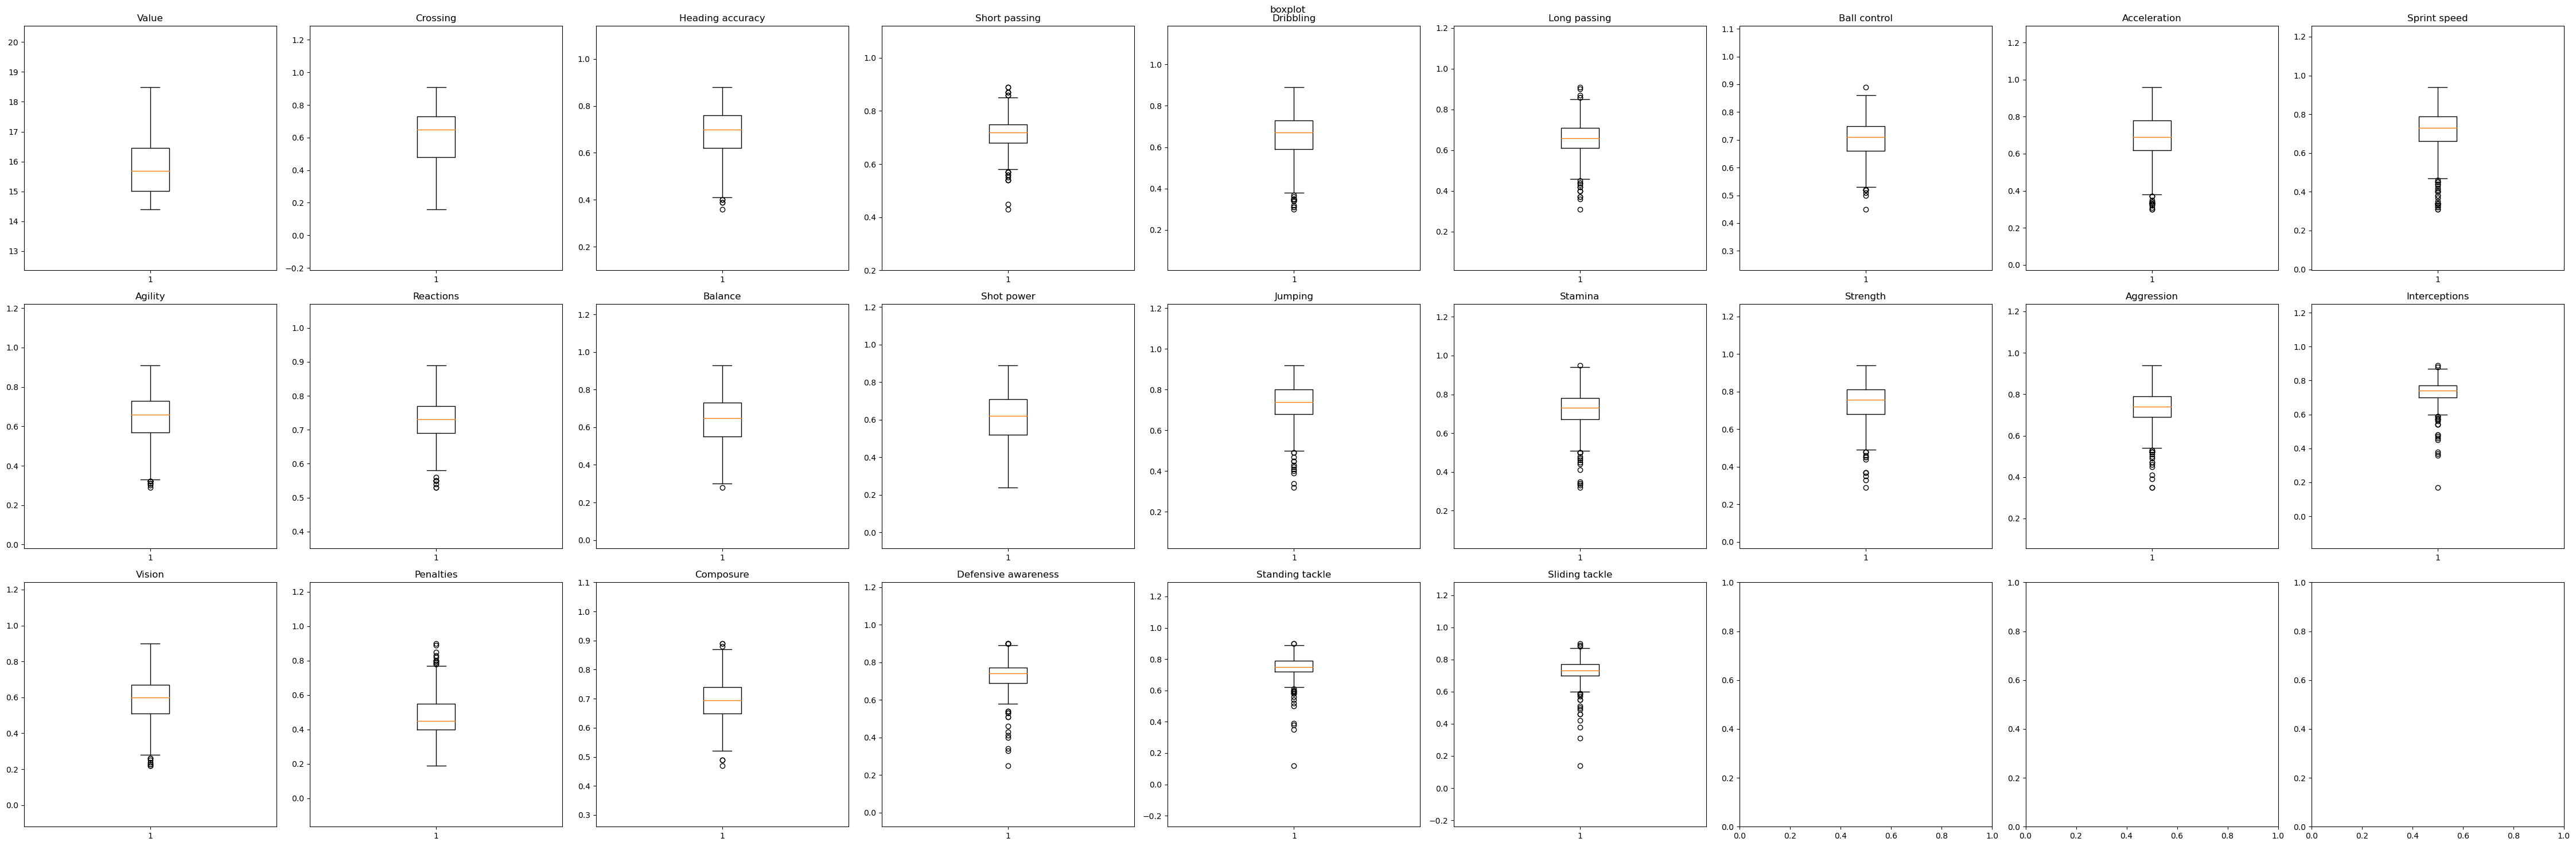

In [12]:
plot_boxplot(numeric_columns, "boxplot", 9)

In [13]:
for column in df.columns:
  outliers(df, column)

Lower fence is = 12.841730734722471
Higher fence is = 18.622270179293768
Applied to 0 row(s) of Value column
Lower fence is = 0.10499999999999998
Higher fence is = 1.105
Applied to 0 row(s) of Crossing column
Lower fence is = 0.41
Higher fence is = 0.97
Applied to 5 row(s) of Heading accuracy column
Lower fence is = 0.5750000000000002
Higher fence is = 0.855
Applied to 19 row(s) of Short passing column
Lower fence is = 0.37999999999999995
Higher fence is = 0.94
Applied to 14 row(s) of Dribbling column
Lower fence is = 0.46
Higher fence is = 0.8599999999999999
Applied to 18 row(s) of Long passing column
Lower fence is = 0.5250000000000001
Higher fence is = 0.885
Applied to 9 row(s) of Ball control column
Lower fence is = 0.3737499999999998
Higher fence is = 1.0237500000000002
Applied to 19 row(s) of Acceleration column
Lower fence is = 0.465
Higher fence is = 0.9850000000000001
Applied to 28 row(s) of Sprint speed column
Lower fence is = 0.3299999999999999
Higher fence is = 0.97
Applied

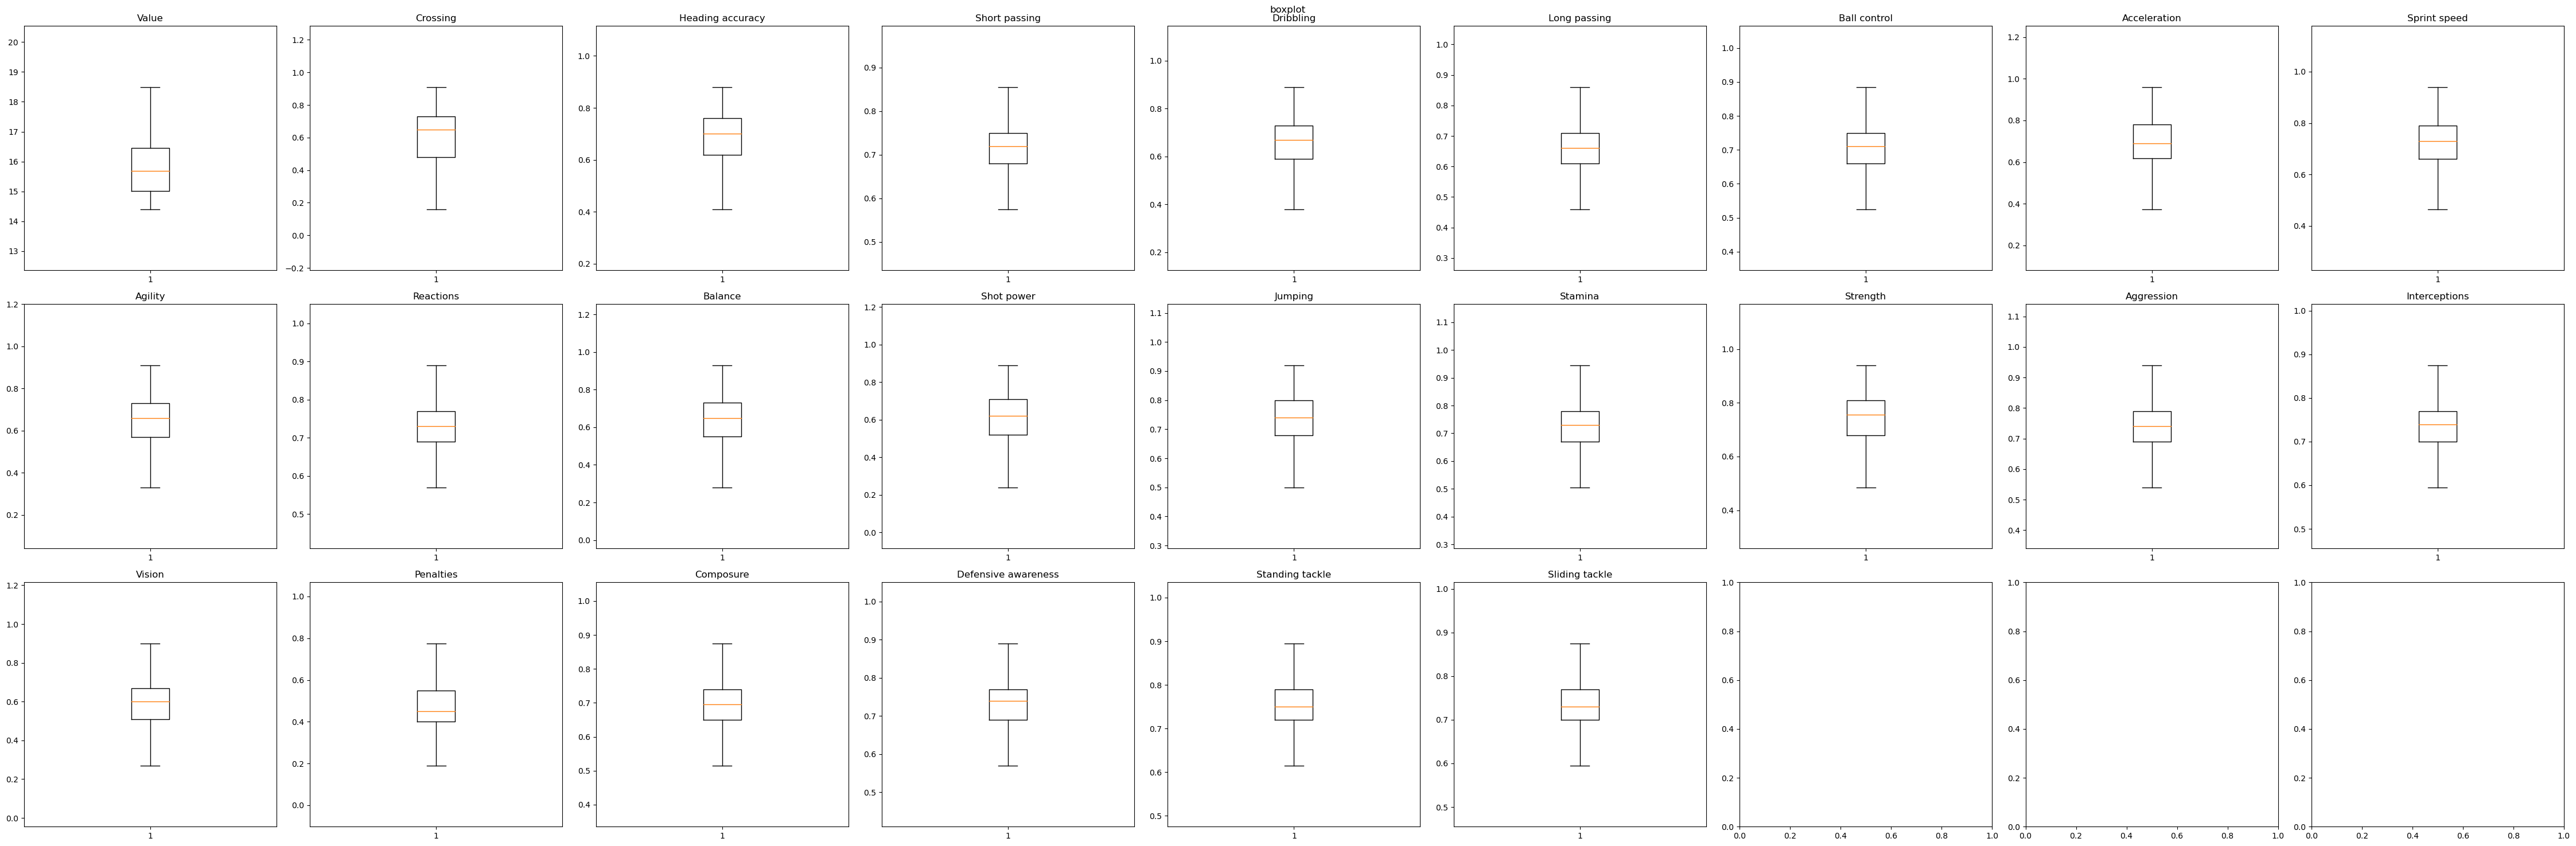

In [14]:
plot_boxplot(numeric_columns, "boxplot", 9)

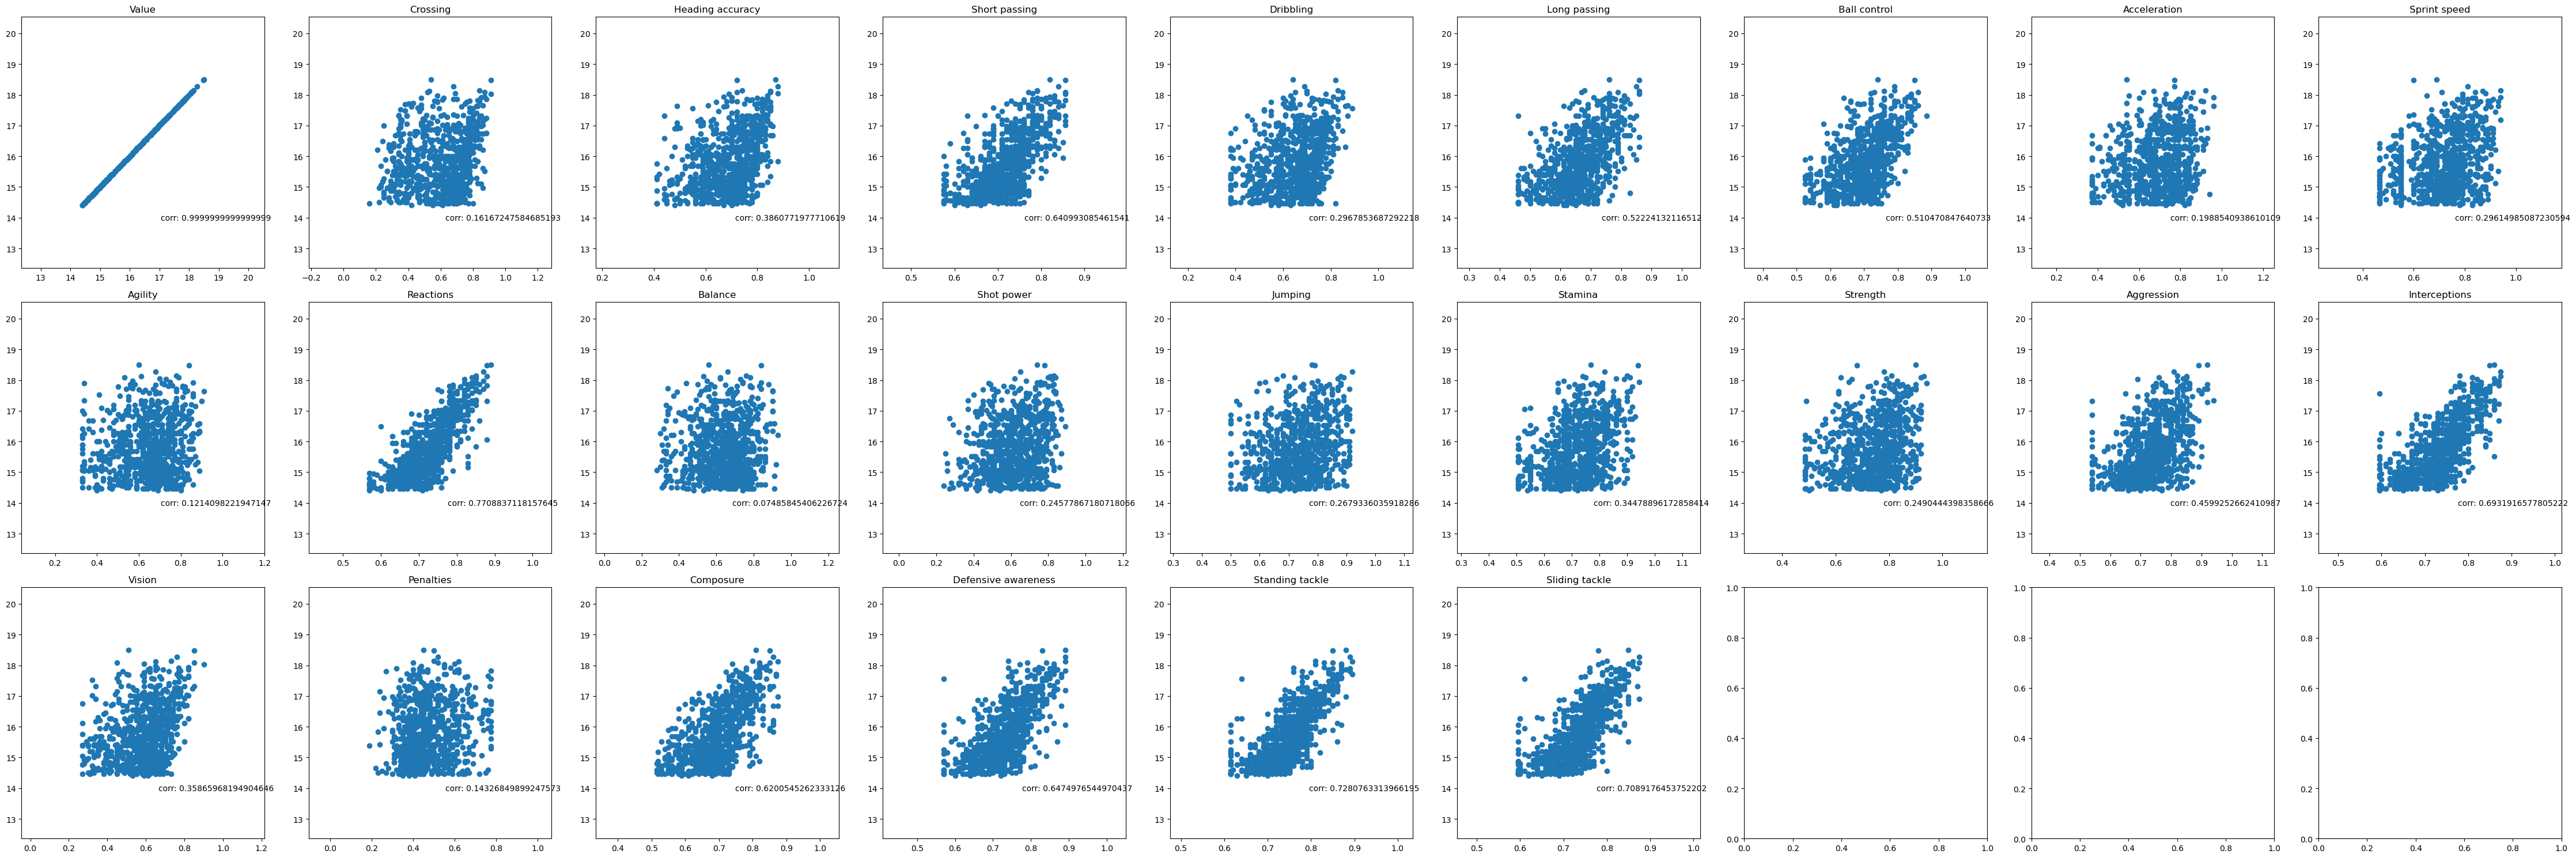

In [15]:
scatterPlotToTarget(numeric_columns, target='Value', ncolumns=9)

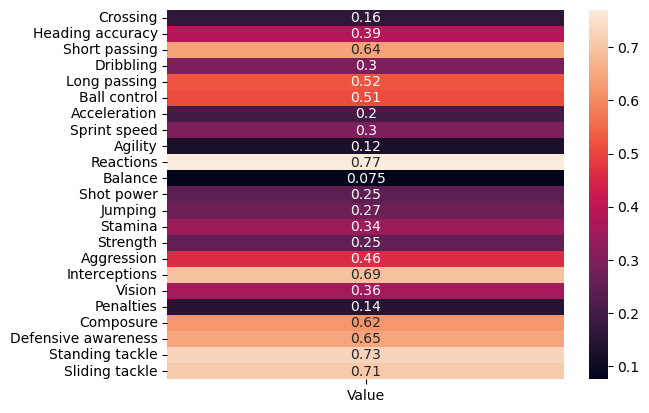

In [16]:
# tính corelation
# 1 là phụ thuộc tuyến tính dương
# 0 là ko phụ thuộc tt
# -1 là phụ thuộc tt âm
correlations = df.corr().drop('Value', axis=0)['Value']
correlations = pd.DataFrame(correlations)
sns.heatmap( correlations, annot=True, yticklabels=True)
plt.show()

In [17]:
# Tính Q3 của tất cả các tương quan với 'value'
q3_corr_value = correlations['Value'].quantile(0.75)

attrWithHighCorr = []
for index, value in correlations['Value'].items():
    if value > q3_corr_value:
        attrWithHighCorr.append(index)

# Hiển thị các thuộc tính được chọn
print("Attributes with high correlation value:", attrWithHighCorr)

Attributes with high correlation value: ['Short passing', 'Reactions', 'Interceptions', 'Defensive awareness', 'Standing tackle', 'Sliding tackle']


In [18]:
# các thuộc tính có correlation với Value cao sẽ được bình phương để dự đoán nhạy hơn với các thuộc tính này
for attr in attrWithHighCorr:
    df[attr] = (df[attr]**2) * 100
df

,Value,Crossing,Heading accuracy,Short passing,Dribbling,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Aggression,Interceptions,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle
0,18.493001,0.54,0.87,67.2400,0.64,0.76,0.74,0.54,0.69,0.60,79.21,0.56,0.74,0.78,0.77,0.90,0.92,73.9600,0.51,0.45,0.810,79.21,77.4400,72.2500
1,18.474222,0.91,0.72,73.1025,0.82,0.86,0.85,0.77,0.60,0.84,77.44,0.84,0.78,0.79,0.94,0.68,0.89,72.2500,0.85,0.50,0.850,68.89,72.2500,60.8400
2,18.275655,0.68,0.88,70.5600,0.69,0.85,0.79,0.77,0.81,0.68,75.69,0.66,0.65,0.92,0.82,0.78,0.81,76.5625,0.76,0.52,0.860,79.21,79.2100,76.5625
3,18.146244,0.84,0.74,62.4100,0.83,0.68,0.79,0.92,0.94,0.78,72.25,0.76,0.83,0.68,0.90,0.81,0.82,60.8400,0.73,0.50,0.800,54.76,65.6100,64.0000
4,18.132999,0.53,0.85,62.4100,0.70,0.86,0.76,0.67,0.87,0.61,77.44,0.53,0.81,0.88,0.74,0.93,0.85,76.5625,0.65,0.62,0.875,79.21,80.1025,73.9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,14.457364,0.70,0.41,44.8900,0.70,0.69,0.72,0.74,0.76,0.74,38.44,0.79,0.65,0.52,0.68,0.51,0.70,39.6900,0.55,0.45,0.530,44.89,50.4100,49.0000
836,14.457364,0.54,0.41,33.0625,0.68,0.54,0.67,0.84,0.86,0.67,39.69,0.70,0.66,0.55,0.63,0.49,0.54,35.4025,0.58,0.52,0.640,32.49,37.8225,35.4025
837,14.403297,0.61,0.48,36.0000,0.63,0.61,0.61,0.82,0.78,0.80,32.49,0.74,0.42,0.67,0.72,0.50,0.70,35.4025,0.59,0.38,0.590,36.00,39.6900,38.4400
838,14.403297,0.42,0.67,39.6900,0.55,0.62,0.57,0.73,0.83,0.69,36.00,0.53,0.54,0.72,0.54,0.77,0.66,42.2500,0.53,0.35,0.610,40.96,42.2500,42.2500


In [19]:
from sklearn.model_selection import train_test_split

y = df['Value']
X = df.drop(['Value'], axis=1)

# tỉ lệ 20% là dữ liệu để test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate

models = {
    'linear_regression': LinearRegression(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(100)
}
reg_linear_models = {
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
}

for (model_name, model) in models.items():
    # chia tập train thành 5 tập nhỏ và tạo ra 5 model được train trên từng tập nhỏ
  cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
  # test 5 model trên tập test
  y_pred = [estimator.predict(X_test) for estimator in cv_results['estimator']]
  # lấy trung bình
  y_pred = np.average(y_pred, axis=0)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  # gần 1 là tốt
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.3178387878073859
RMSE:  0.4016816805633402
r2 score:  0.819475715759258

decision_tree
MAE:  0.3247276531852784
RMSE:  0.418749738473098
r2 score:  0.8038082782079875

random_forest
MAE:  0.29041918170037073
RMSE:  0.36927303300019576
r2 score:  0.8474308355108287



In [21]:
from sklearn.model_selection import GridSearchCV

# thử hằng số phạt
param_grid = {
    'ridge_regression': {'alpha': np.arange(0.1, 0.2, 0.01)},
    'lasso_regression': {'alpha': np.arange(0.0001, 0.001, 0.0001)}
}

for (model_name, model) in reg_linear_models.items():
  # tìm alpha cho mô hình tốt nhất bằng cách thử các alpha với phương pháp cross-validate
  grid_search = GridSearchCV(model, param_grid[model_name], scoring='r2')
  grid_search.fit(X_train, y_train)
  # chọn alpha tốt nhất
  reg_linear_models[model_name] = grid_search.best_estimator_
  # huấn luyện lại trên toàn bộ tập train để tìm ra tham số của hàm tuyến tính
  reg_linear_models[model_name].fit(X_train, y_train)
  y_pred = reg_linear_models[model_name].predict(X_test)
  print(reg_linear_models[model_name])
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

Ridge(alpha=0.18999999999999995)
MAE:  0.31774723066835536
RMSE:  0.40170831774528276
r2 score:  0.8194517723340129

Lasso(alpha=0.0008)
MAE:  0.31821771018327205
RMSE:  0.40348847011491357
r2 score:  0.8178480440398728



In [22]:
models['random_forest'].fit(X_train, y_train)
y_pred = models['random_forest'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,14.880221,15.154360
1,14.508658,14.855757
2,17.665658,17.443343
3,15.096444,15.318203
4,17.014184,16.172048
...,...,...
163,15.607270,15.224444
164,14.880221,14.719342
165,16.418200,16.136503
166,14.845130,15.156641


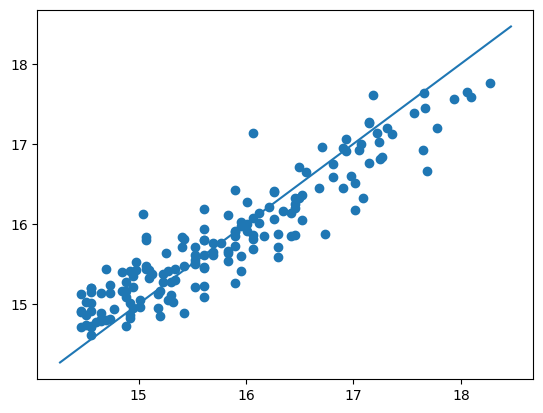

In [23]:
# các điểm nằm dưới đường chéo cho thấy y_test > y_pred và ngược lại
plt.scatter(y_test, y_pred)
plt.plot(plt.xlim(), plt.xlim())

In [24]:
percent_loss = np.sum(abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 1./len(y_test)
percent_loss

0.3061616132269157

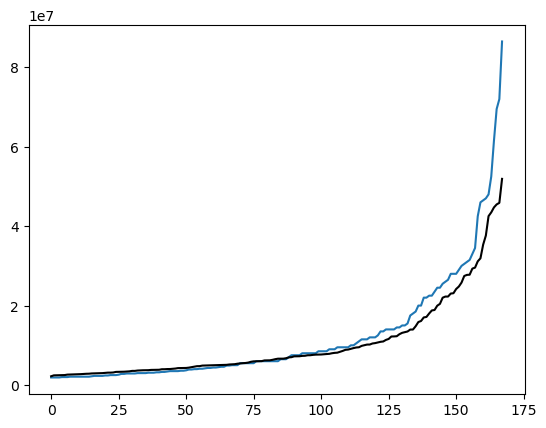

In [25]:
y_test = list(y_test)
y_test.sort()
y_pred.sort()
plt.plot(range(len(y_test)), np.exp(y_test))
plt.plot(range(len(y_test)), np.exp(y_pred), color='#000000')